In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive (1).zip


In [ ]:
df= pd.read_csv(r"archive.zip")
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


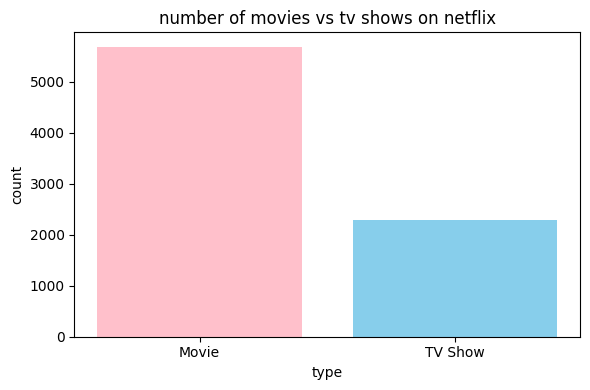

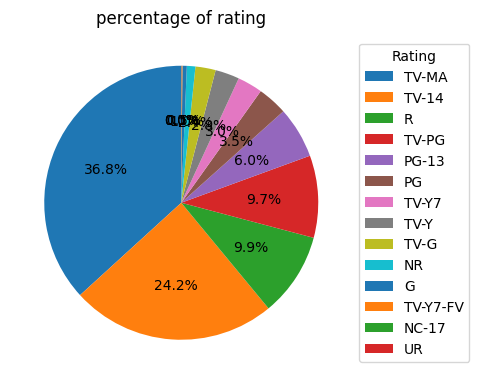

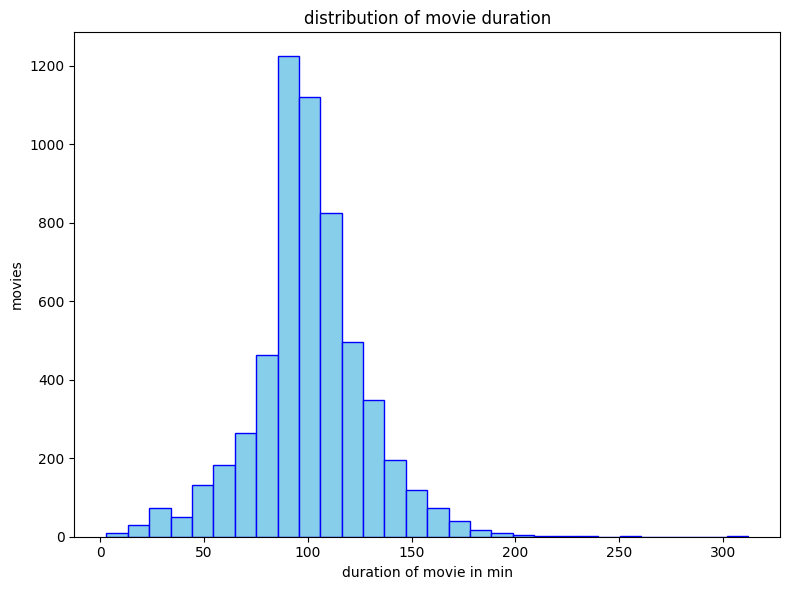

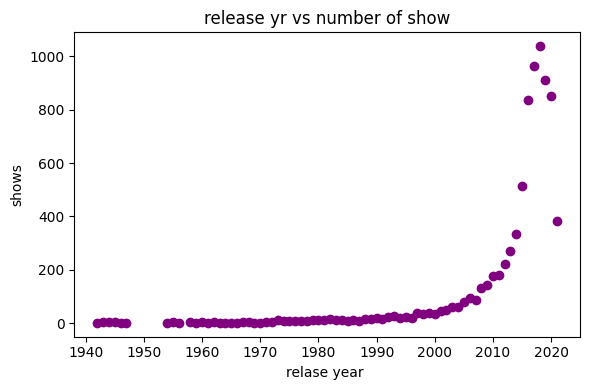

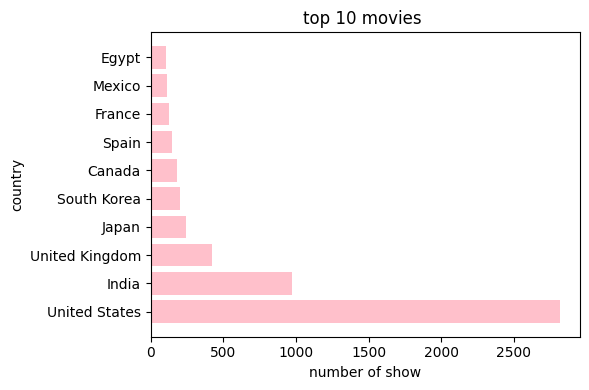

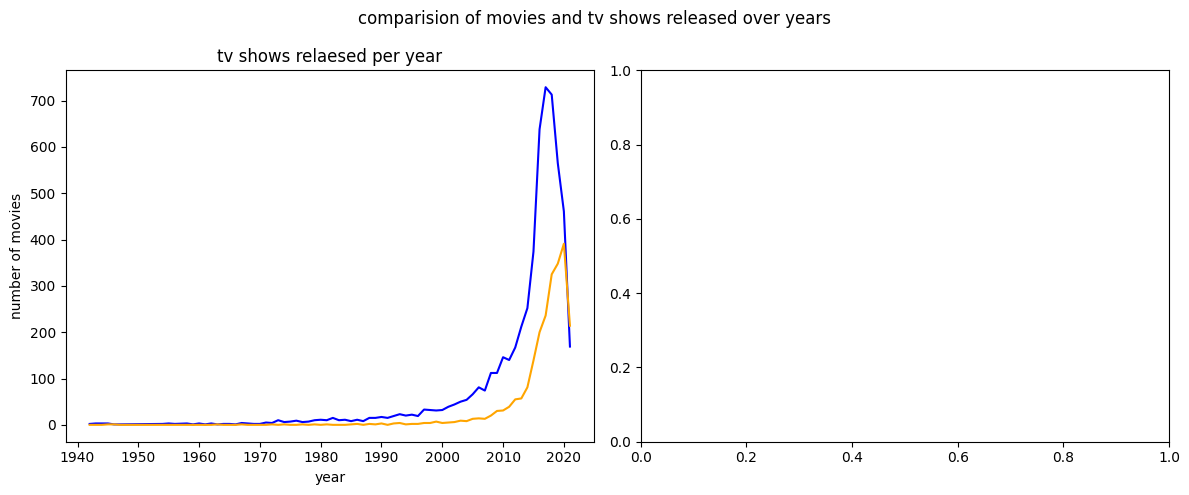

In [ ]:
df=df.dropna(subset=['type','release_year','rating','country','duration'])
types_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(types_counts.index,types_counts.values,color=['pink','skyblue'])
plt.title('number of movies vs tv shows on netflix')
plt.xlabel('type')
plt.ylabel('count')
plt.tight_layout()

plt.figure(figsize=(6,4))
rating_counts=df["rating"].value_counts()
plt.pie(rating_counts.values,autopct='%1.1f%%',startangle=90)
plt.title('percentage of rating')
plt.legend(rating_counts.index, title='Rating', loc='center left', bbox_to_anchor=(1,0.5))
plt.tight_layout()

movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='skyblue',edgecolor='blue')
plt.title("distribution of movie duration")
plt.xlabel("duration of movie in min")
plt.ylabel("movies")
plt.tight_layout()

release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.scatter(release_counts.index,release_counts.values,color='purple')
plt.title("release yr vs number of show")
plt.xlabel("relase year ")
plt.ylabel("shows")
plt.tight_layout()

country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(6,4))
plt.barh(country_counts.index,country_counts.values,color='pink')
plt.title("top 10 movies ")
plt.xlabel("number of show")
plt.ylabel("country")
plt.tight_layout()
content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)
fig,ax=plt.subplots(1,2,figsize=(12,5))

ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('movies relaesed per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('number of movies')

ax[0].plot(content_by_year.index,content_by_year['TV Show'],color='orange')
ax[0].set_title('tv shows relaesed per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('number of movies')
fig.suptitle('comparision of movies and tv shows released over years')
plt.tight_layout()